# Project 6, Laplace's and Poisson's equations
**Devon DeJohn** | PHY 4611 | May 6, 2019

> The final project on partial differential equations deals with both Laplace's equation and its non-homogeneous version, Poisson's equation. We start with the analytic solution to the 2D Laplace equation in terms of a Fourier series which stems from the method of separation of variables. We compare the errors produced by the partial Fourier sums by varying the number of terms in the sum. We then explore numerical methods for solving the Laplace equation in a cube, for which we use a gradient function to find the electric field inside. Finally, we tackle the 2D Poisson equation.

## 8.1 Analytic solution

> Write a program to evaluate the potential $\Phi(x,y)$ numeriocally, as given by:
>
> $$\Phi(x,y) = \Phi_0 \sum_{n=1,3,5,...}^{\infty} \left[ \frac{4}{n \pi} sin\left( \frac{n \pi}{L_x} x\right) \frac{sinh\left( \frac{n\pi}{L_x} y\right)}{sinh\left( \frac{n\pi L_y}{L_x}\right)} \right]$$
>
> on a `50x50` grid. Take $\Phi_0 = 1$ and graph your solution by mesh and contour plots. Plot your results using terms through `n = 11, 21, 51`. Estimate how many terms in the infinite sum are needed to obtain about `1%` accuracy in the solution.

I initially guessed around `90-100` would be needed, but found when actually plotting that closer to `150` terms are necessary in order to stay within the `1%` threshold across the majority of the constant potential edge (ignoring the Gibbs phenomenon at the corners).

For the error plot I ran the analytical solutions on a `1000x1000` grid simply in order to get smoother curves. This vastly improved the appearance of the graph (the `50x50` solutions looked more like stock market share prices than sines and cosines).

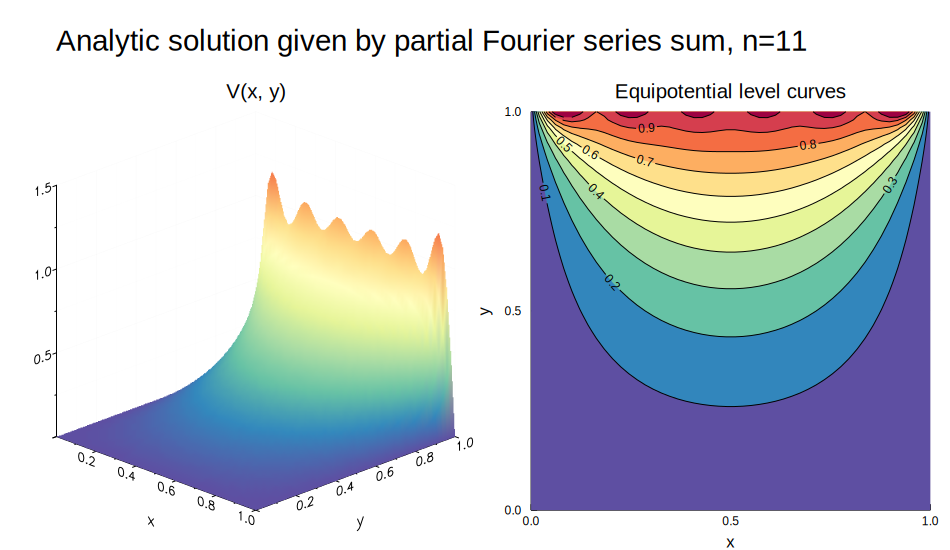

In [3]:
srf_plot(analytic2d(11), ttl="Analytic solution given by partial Fourier series sum, n=11", zlm=(0,Inf))

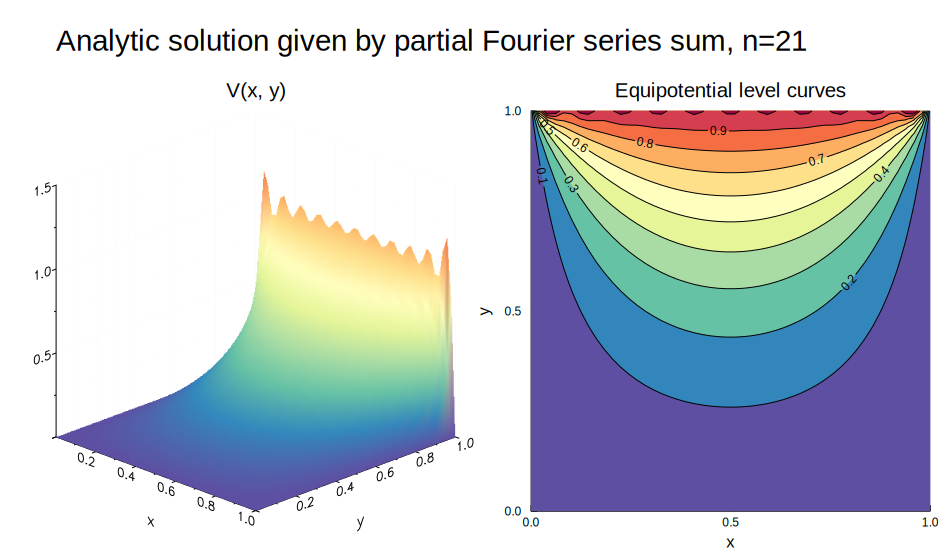

In [4]:
srf_plot(analytic2d(21), ttl="Analytic solution given by partial Fourier series sum, n=21", zlm=(0,Inf))

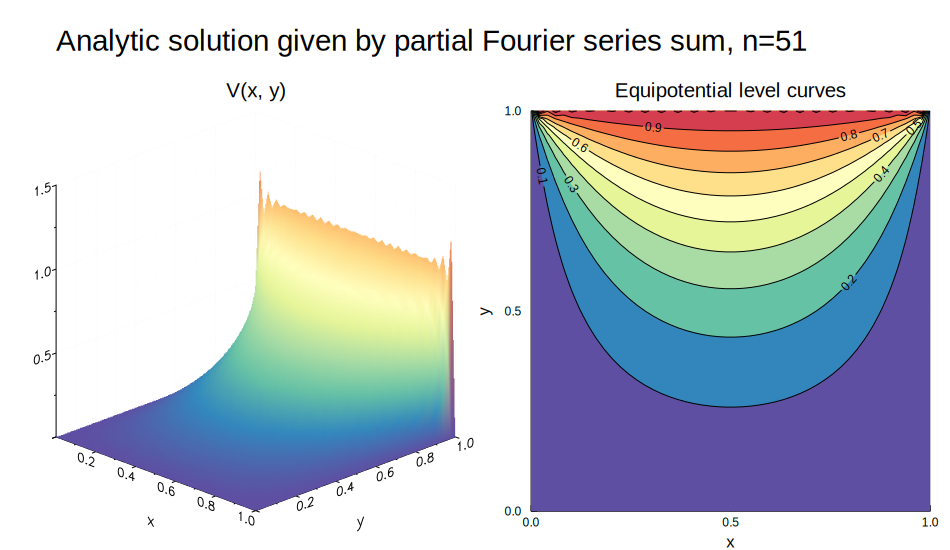

In [5]:
srf_plot(analytic2d(51), ttl="Analytic solution given by partial Fourier series sum, n=51", zlm=(0,Inf))

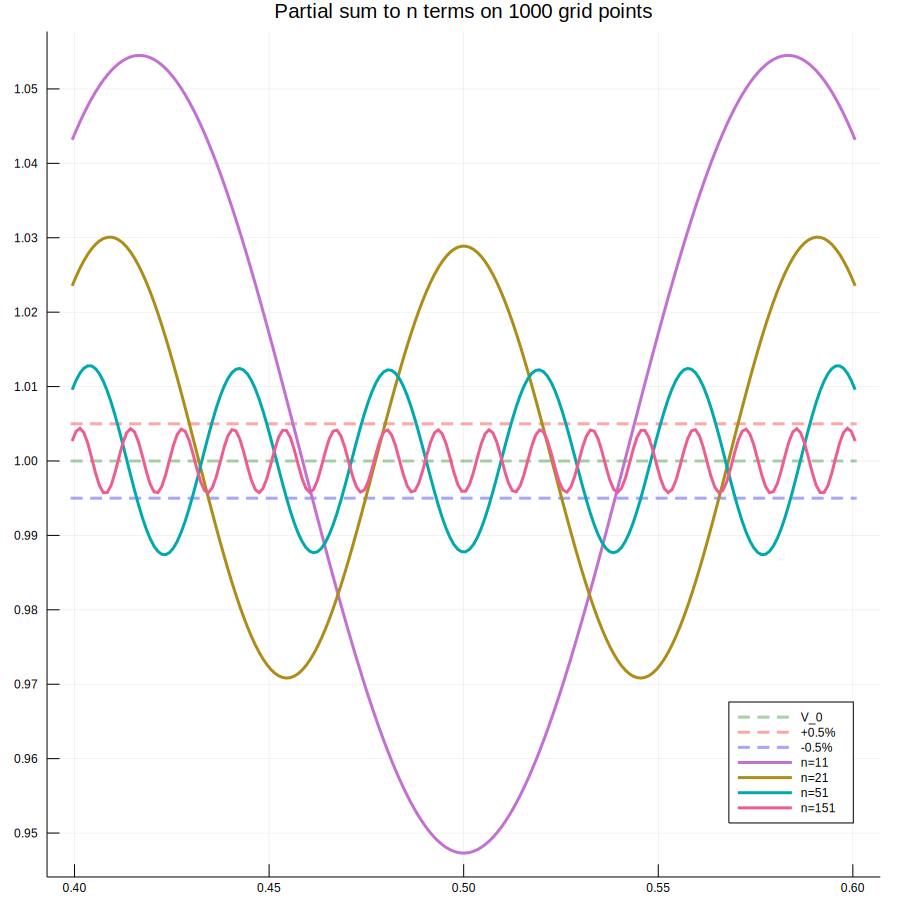

In [6]:
one_percent()

# 8.3 Laplace's equation in a cube

> (a) Find the solution to the three-dimensional cubic boundary value problem,
>
> \begin{align*} \Phi(0,y,z) &= \Phi(L,y,z) = 0 \\ \Phi(x,0,z) &= \Phi(x,L,z) = 0 \\ \Phi(x,y,0) &= \Phi(x,y,L) = \Phi_0 \end{align*}
>
> using separation of variables.
>
> (b) Write a program to graph your solution for a given height $z$. Produce mesh and contour plots of $\Phi(x,y,z)$ for $z=L/4$ and $L/2$.
>
> (c) Write a three-dimensional version of the `relax` program to solve this problem by relaxation. Produce mesh and contour plots of $\Phi(x,y,z)$ for $z=L/4$ and $L/2$; compare with your results from (b).

I worked for a few hours on the analytic solution and got close but I couldn't quite find the correct Fourier coefficients. See attached. I ended up using the answer in the back of the book.

Because of the grid size and spacing, the numerical schemes can't actually plot `z = 0.25` or `z = 0.5` exactly, as those z-levels don't correspond to a grid level but lie somewhere between two grid points. We can see that there is a little bit of variation between the analytic solution and the numerical solutions due to this fact. I could probably fiddle with the grid size and spacing a bit so that the grid would line up with `L/2` and `L/4`, but I decided it wasn't worth the extra time since the plots shown are already close enough.

Part `(c)` doesn't specify which scheme to use so I plot all three (Jacobi, Gauss-Seidel, Successive Over-Relaxation).

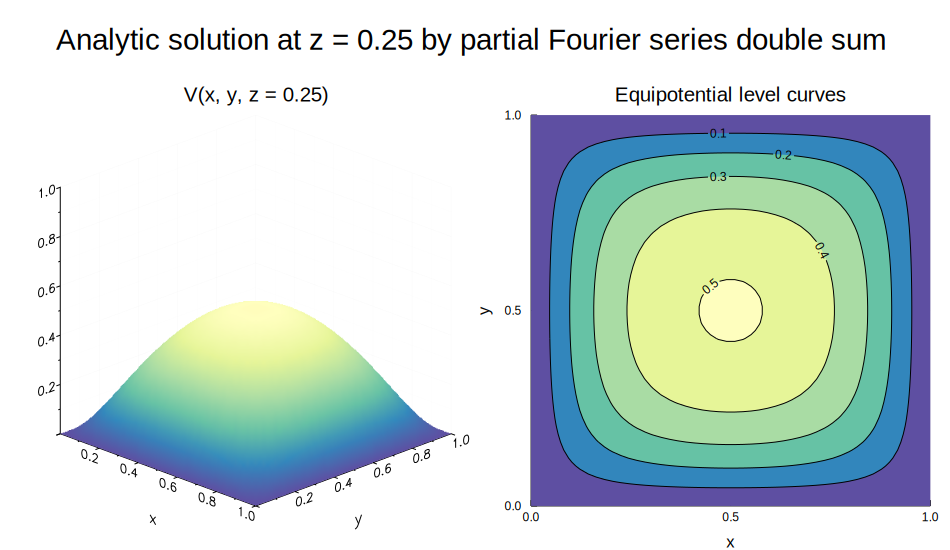

In [7]:
srf_plot(analytic3d(n=50, z=0.25),
    ttl="Analytic solution at z = 0.25 by partial Fourier series double sum", zslc=", z = 0.25")

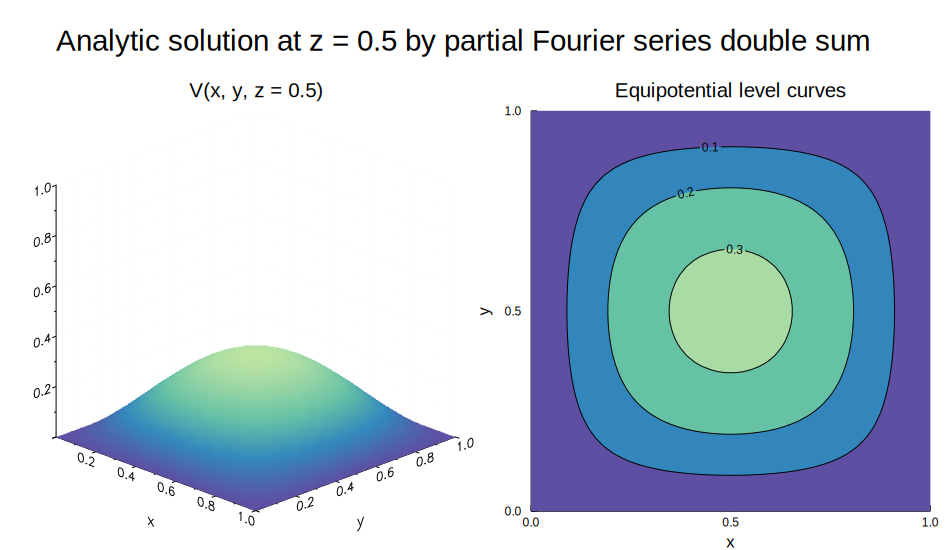

In [8]:
srf_plot(analytic3d(n=50, z=0.5), 
    ttl="Analytic solution at z = 0.5 by partial Fourier series double sum", zslc=", z = 0.5")

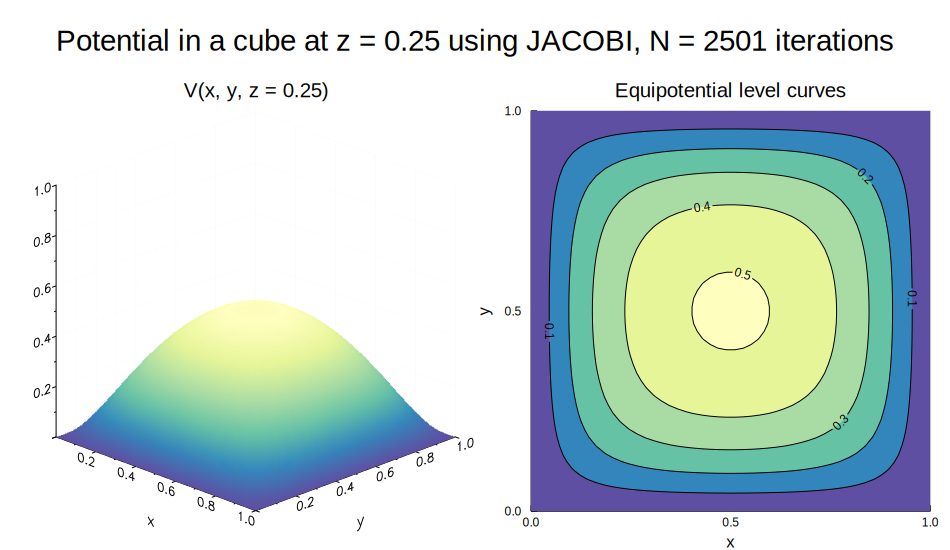

In [9]:
vol_plot(laplace(mthd=jacobi), lvl=0.25)

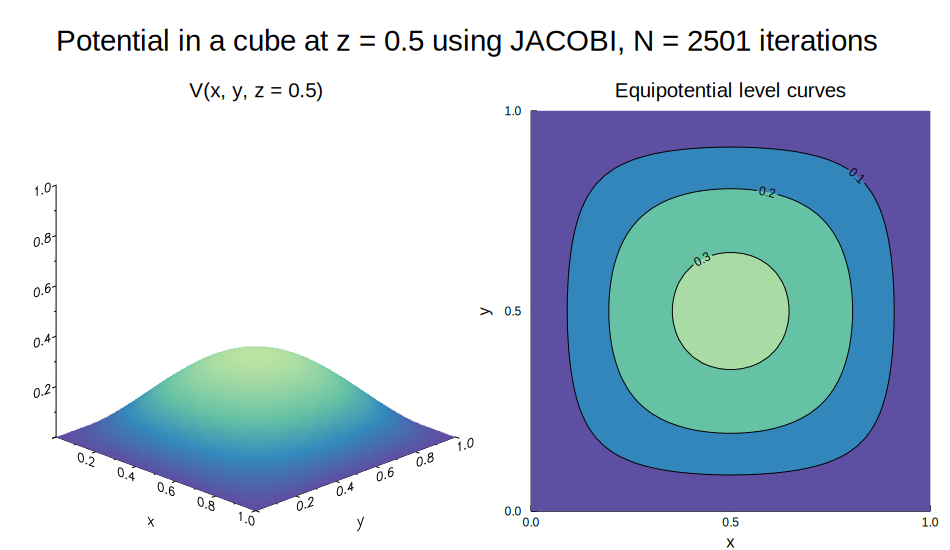

In [10]:
vol_plot(laplace(mthd=jacobi), lvl=0.5)

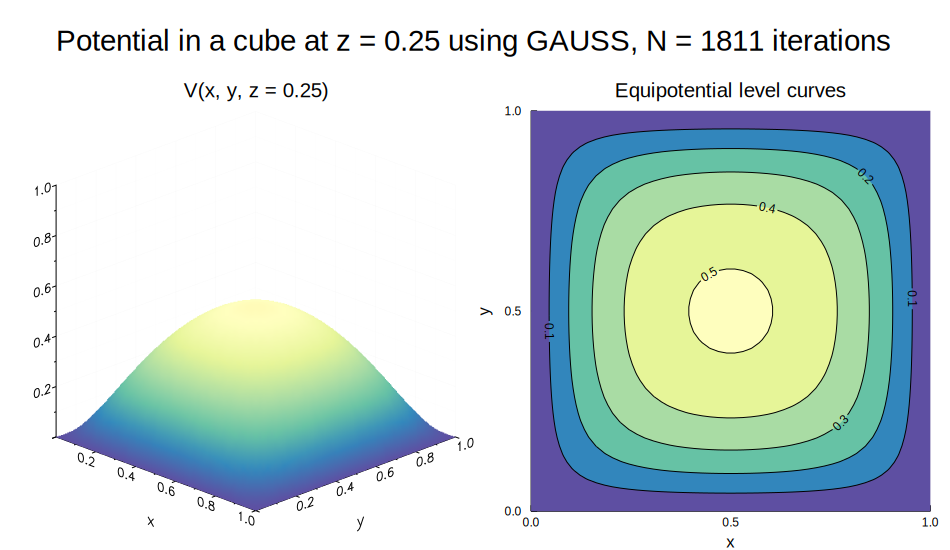

In [11]:
vol_plot(laplace(mthd=gauss), lvl=0.25)

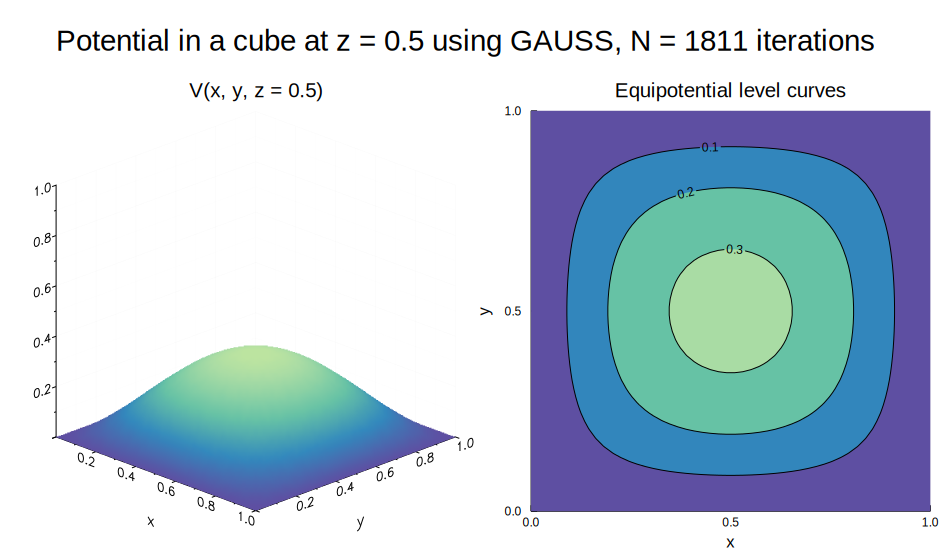

In [12]:
vol_plot(laplace(mthd=gauss), lvl=0.5)

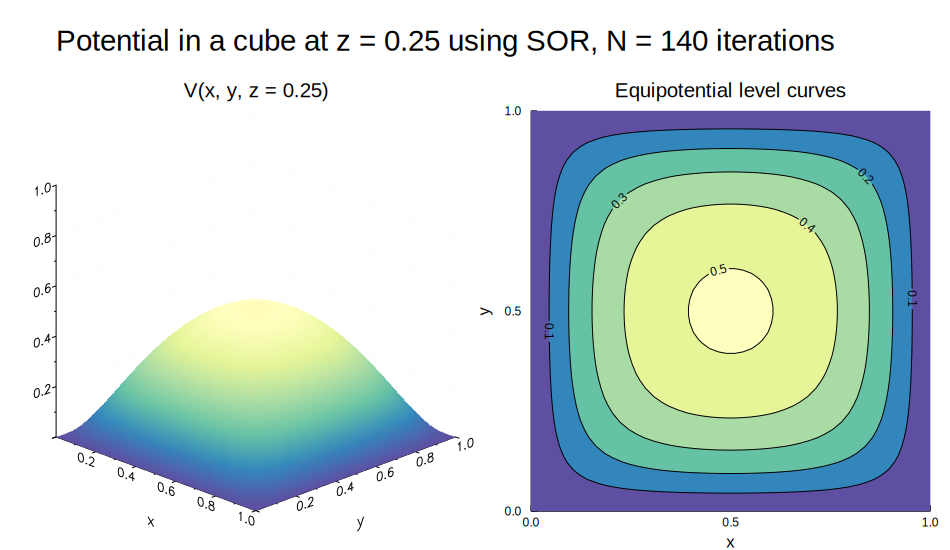

In [13]:
vol_plot(laplace(mthd=sor), lvl=0.25)

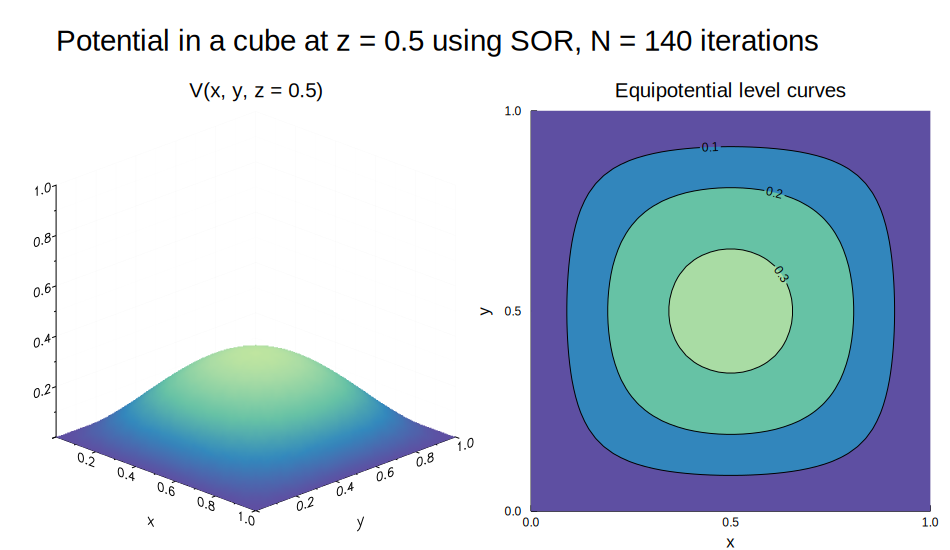

In [14]:
vol_plot(laplace(mthd=sor), lvl=0.5)

Somebody on the Slack channel for the Julia language suggested I do a maximum emission projection plot of the cube. It's pretty neat, and in combination with the z-slice plots I think it does actually help with the intuition.

This projection method does not show the two sides of the cube that are held at constant potential since they would be pure white and block out a lot of the information about the interior. I've also flipped the cube on its side as I find this angle the best for viewing the interior (as opposed to the z-axis being up and down).

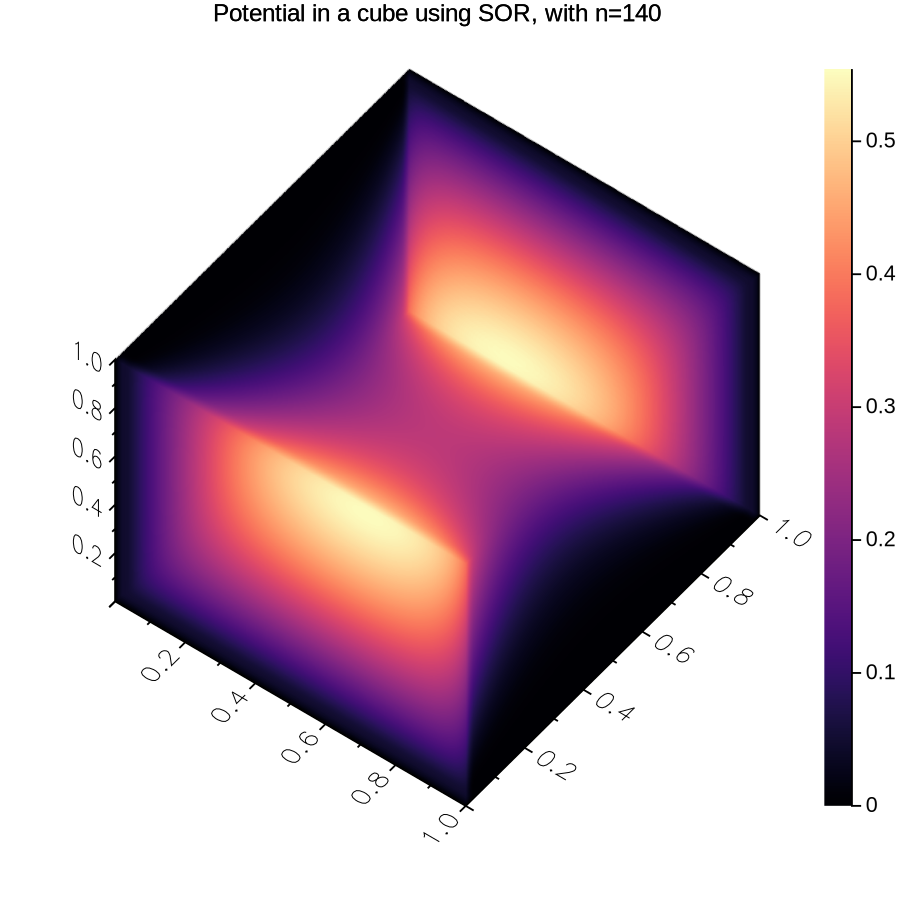

In [2]:
mep(mthd=sor)

## 8.4 Computation times

> A major issue with the relaxation methods is their computational speed. (a) run the `relax` program using the Jacobi method for different sized systems (N = 10 to 50). Graph the number of iterations performed versus system size. Fit the data to a power law and approximate the exponent. (b) Repeat part (a) using a bad initial guess (zeros on the interior). (c) Using SOR, repeat parts (a) and (b). Compare the Jacobi and SOR methods (use the optimum value for $\omega$).

I went ahead and ran this test on all three methods, with three different initial guesses: a bad initial guess where the interior points are initialized to zero, a mediocre initial guess where the interior points are initialized to random values between `0.0` and `1.0`, and a good initial guess which initializes the interior points using the first five terms of the analytic solution.

Surprisingly, the Jacobi method does not improve between the zeros and random values, but Gauss-Seidel and SOR do. I was also surprised to see that the SOR method is actually very consistent regardless of the initial interior values, and does not improve much over the three different guesses. Even more than that, I found that SOR actually performed slightly worse on the random interior points versus all zeros.

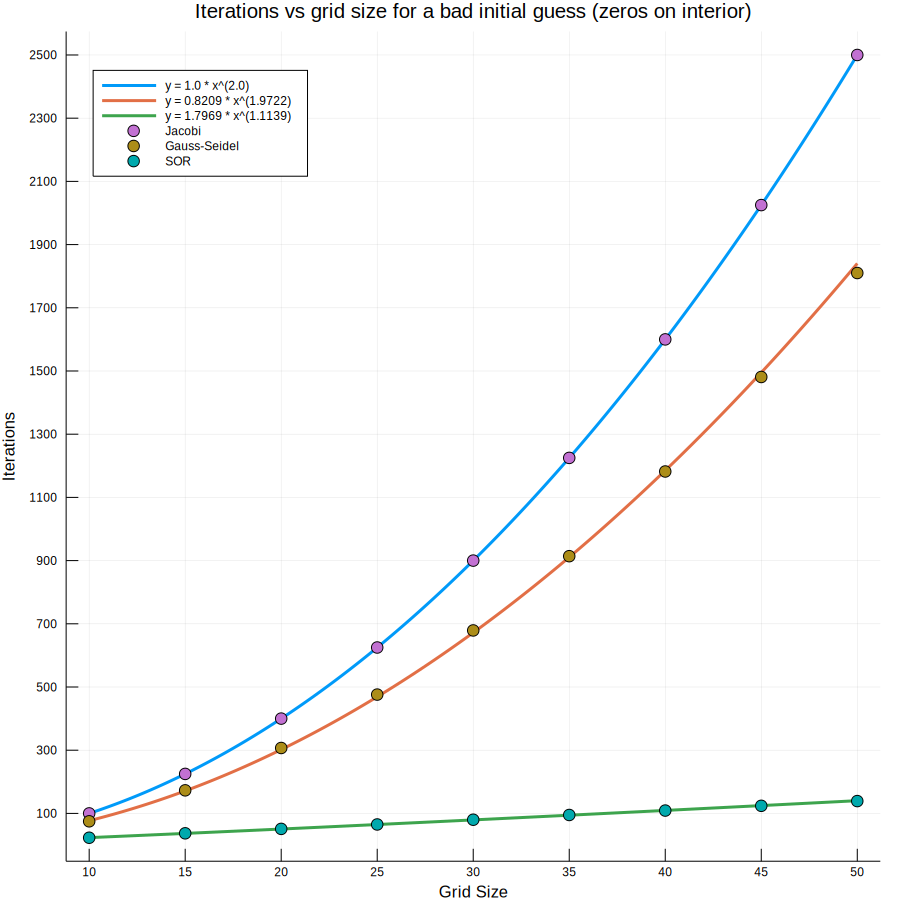

In [15]:
sys_plot(ttl="Iterations vs grid size for a bad initial guess (zeros on interior)", interior=zeroint)

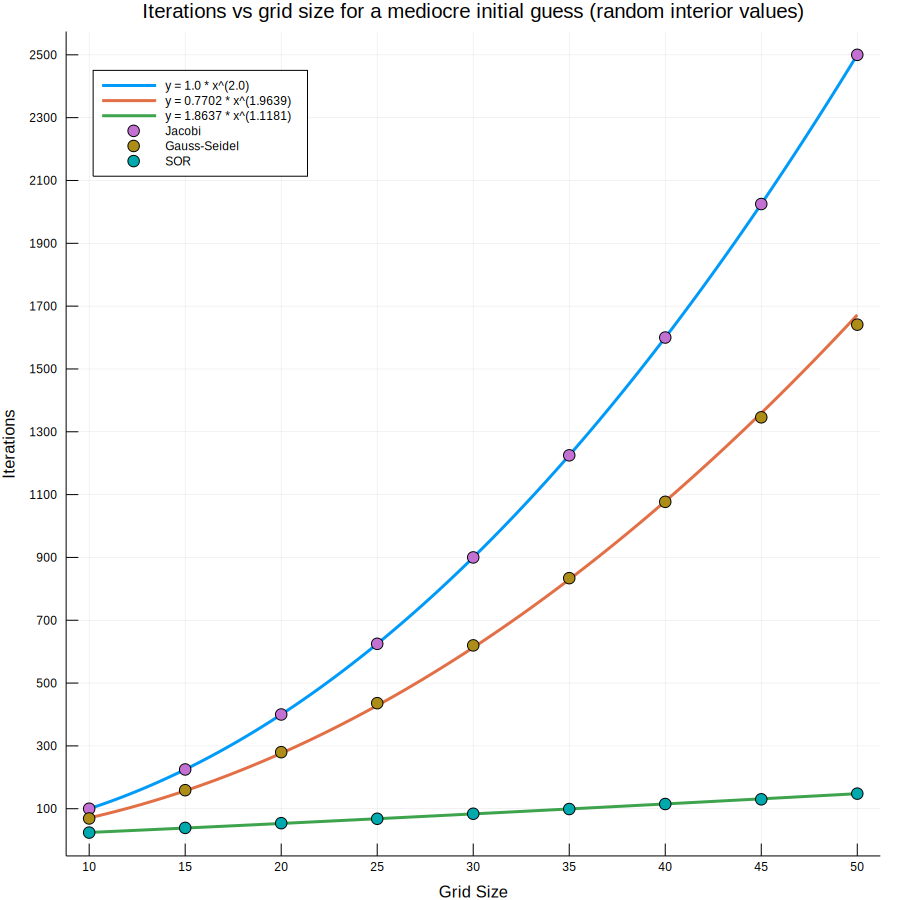

In [16]:
sys_plot(ttl="Iterations vs grid size for a mediocre initial guess (random interior values)", interior=randint)

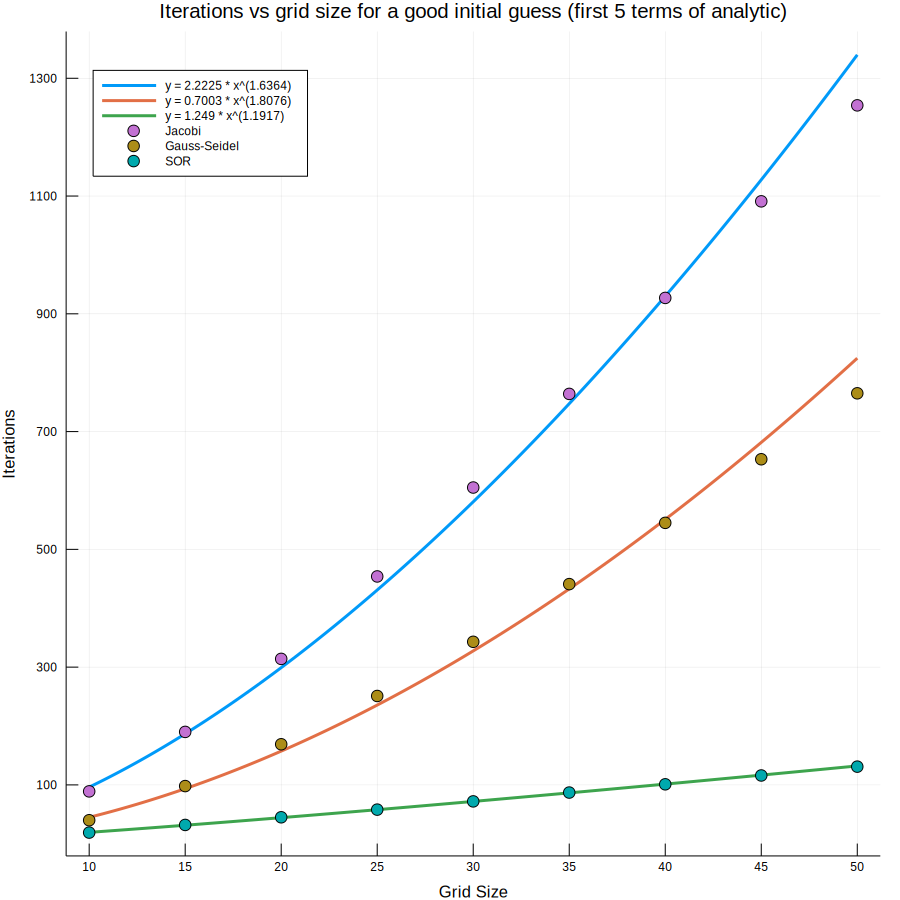

In [17]:
sys_plot(ttl="Iterations vs grid size for a good initial guess (first 5 terms of analytic)", interior=analyticint)

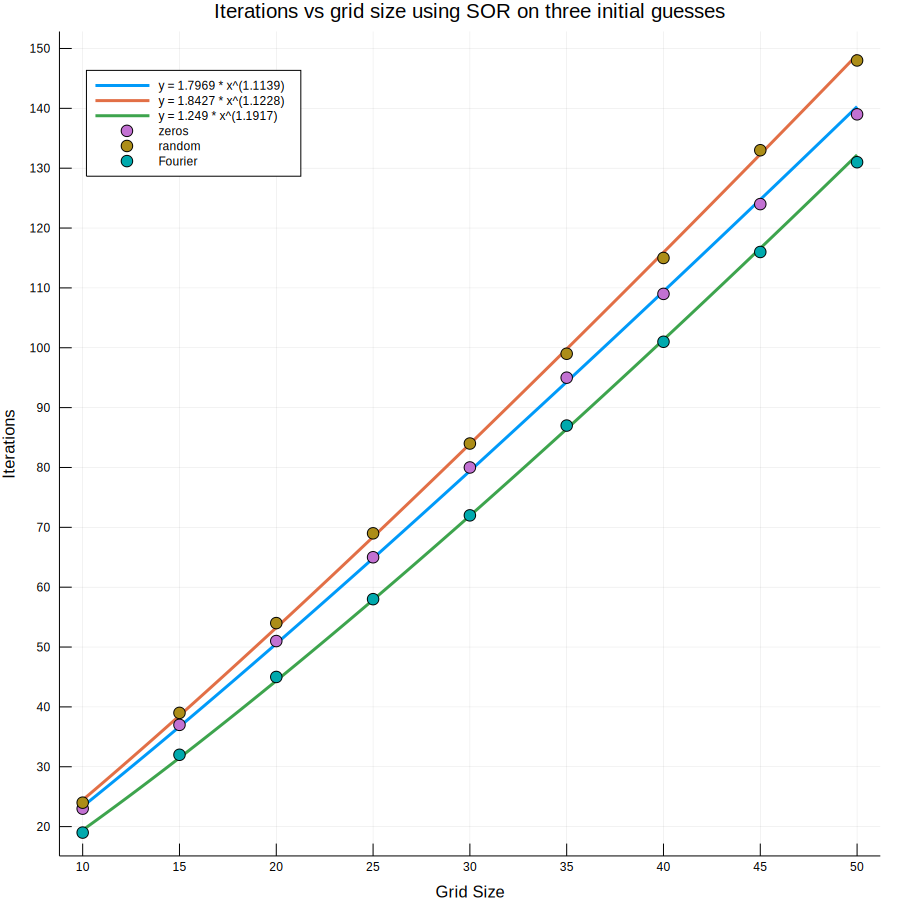

In [5]:
sor_plot(ttl="Iterations vs grid size using SOR on three initial guesses")

## 8.7 Electric field from potential gradient

> Modify the `relax` program to plot the electric field, $E = -\nabla \Phi$. Try both proportional and equal-length field arrows.

The book doesn't specifiy anything beyond plotting the electric field for the 2D surface with one end fixed at a constant potential. I vaguely remember you asking for vector field plots of slices of the cube, but neither the assignment sheet nor problem 8.7 specify, so I chose some random slices from the cube, and also plotted the 2D version.

I wrote my own `gradient` function, since Julia does not have one built-in. This turned out to be quite an interesting challenge and I learned a great deal trying to work through the problem by hand (drawing diagrams, trying to reason through the algorithm).

Julia does have a `quiver` function, so I ended up not having to do the extra work of writing the code for drawing the arrows myself, but there actually isn't any documentation on `quiver` so I couldn't figure out how to alter the proportions of the arrows, I could only scale them manually so that they'd fit on the plot.

The electric field should point in the direction of lowest potential, so we are looking for the negative gradient of the potential.

I've never been particularly excited by E&M (I'm into mechanics—boring I know), but this exercise piqued my interest and I will probably do some reading over the summer.

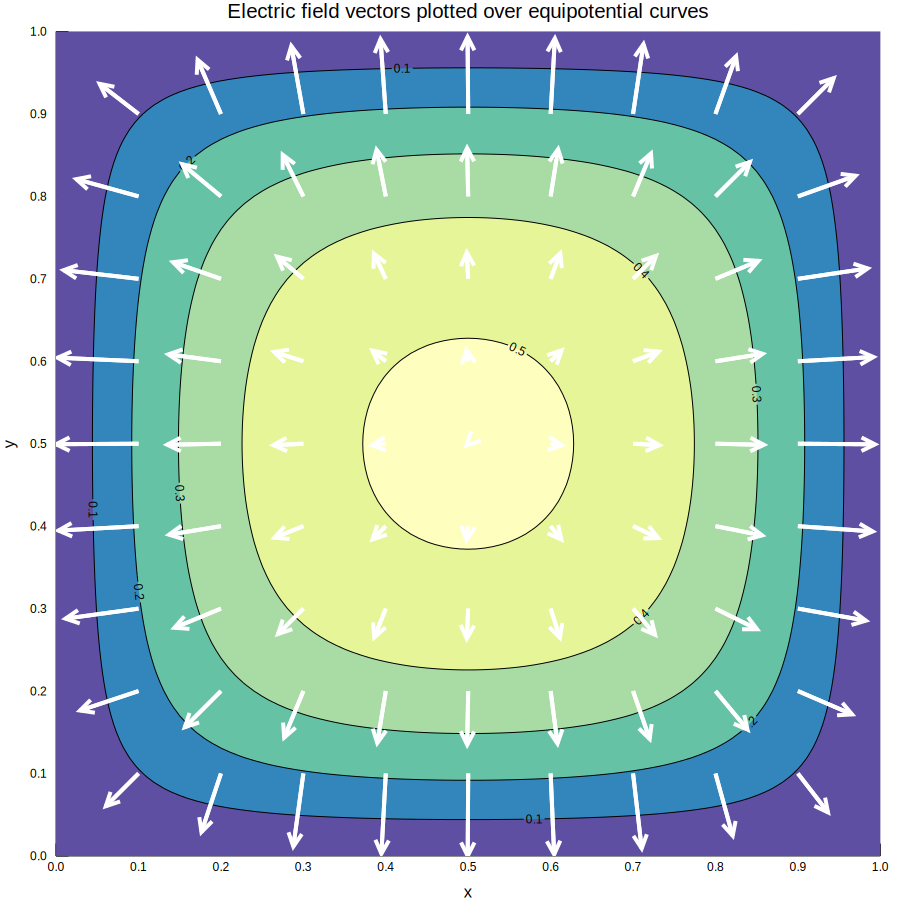

In [12]:
gradient(dim=dim3, lvl=0.25, scale=0.05)

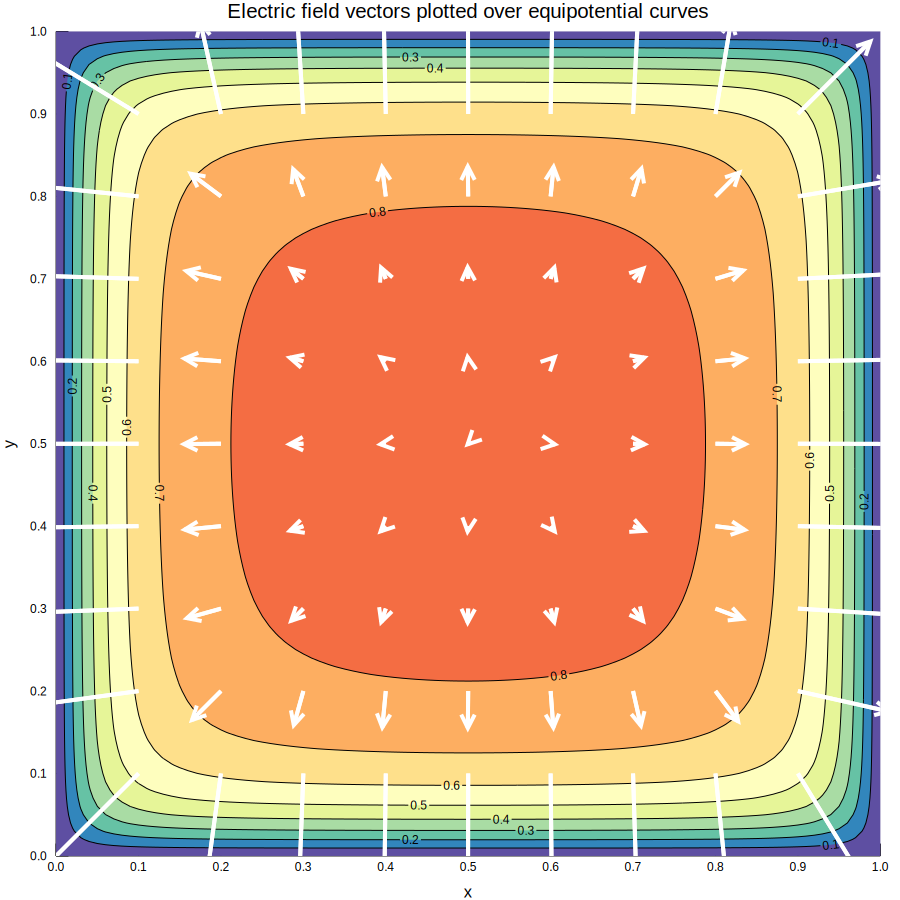

In [15]:
gradient(dim=dim3, lvl=0.95, scale=0.05)

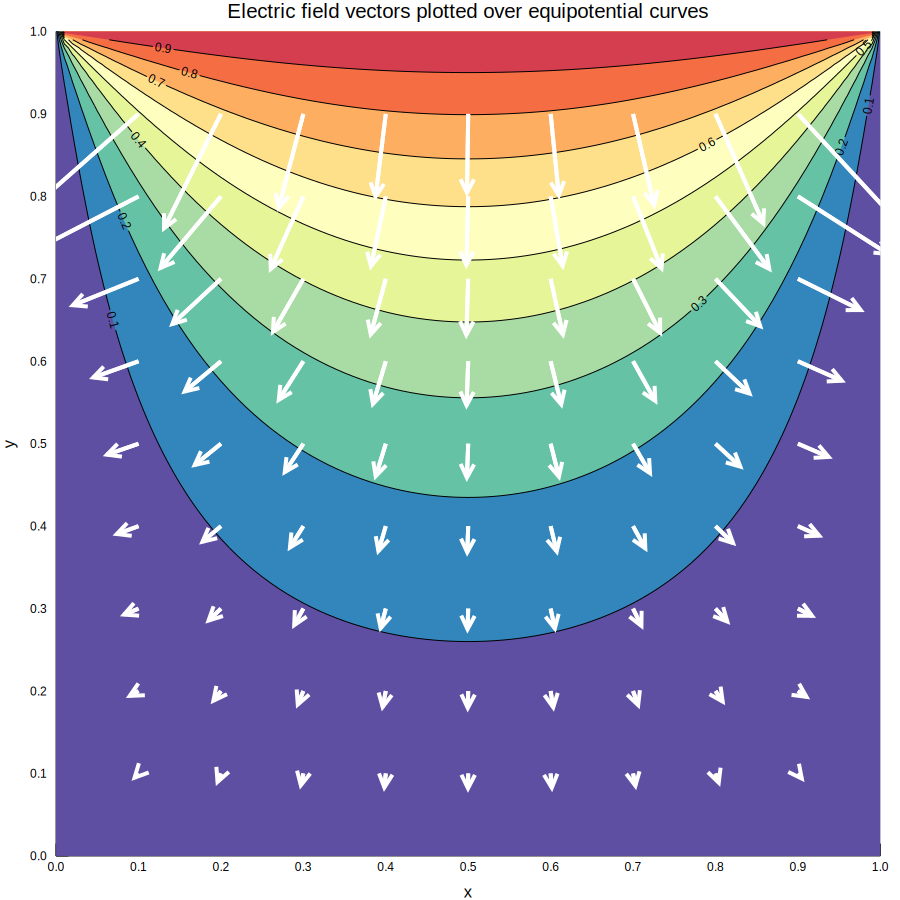

In [42]:
gradient(dim=dim2, scale=0.05)

## 8.10 2D Poisson

> (a) Write a program that solves the two-dimensional Poisson equation in a square geometry with the Dirichlet boundary conditions $\Phi = 0$ at the boundary. Map the potential for a single charge at the center of the system. Compare with the potential for a charge in free space. (b) Modify your program to use periodic boundary conditions. Compare with results from part (a).

I was rushing to finish the writeup and didn't have a lot of time to work through this. I'm honestly not sure what to expect here as I haven't taken E&M and don't have much intuition for this problem. It seems like with periodic boundary conditions the electric field wouldn't really be able to go anywhere, since field lines would essentially "collide". I would guess the field would become extremely warped, but that's not what I see on the plot.

I'm pretty sure I didn't do this exercise correctly. But I still learned quite a lot, especially having written my own gradient function, which was quite difficult to get working properly.

### (a) point charge, dirichlet boundary conditions

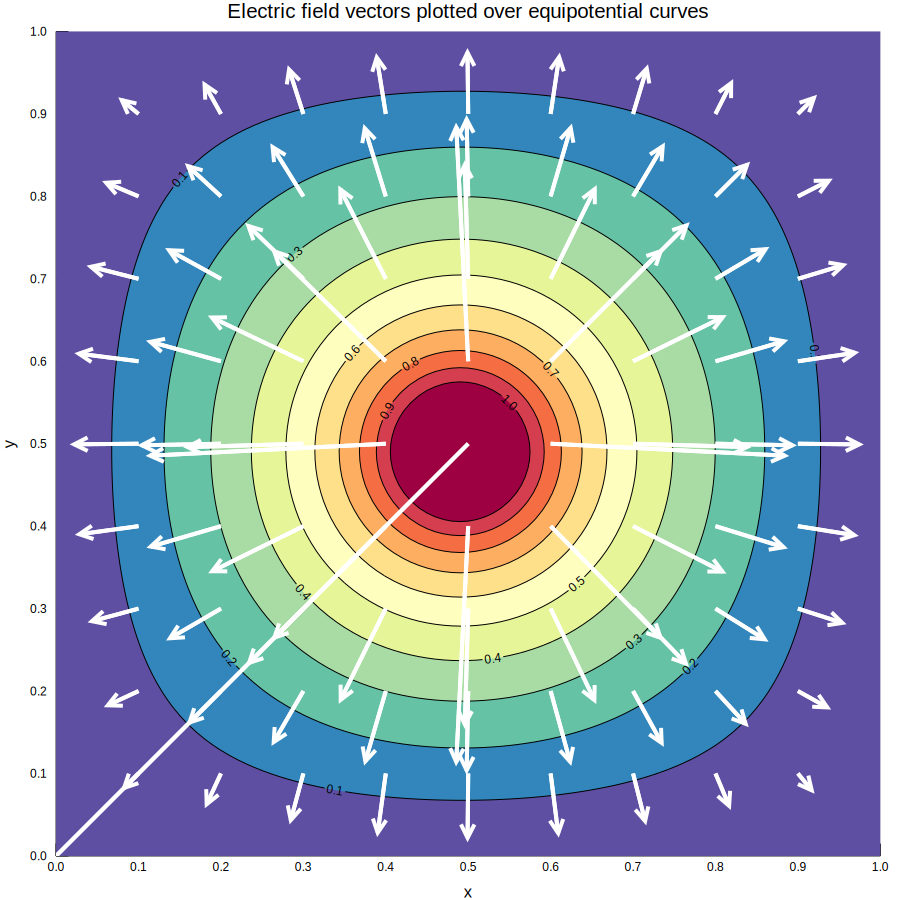

In [55]:
gradient(dim=poisson_dir, scale=0.05)

### (b) point charge, periodic boundary conditions

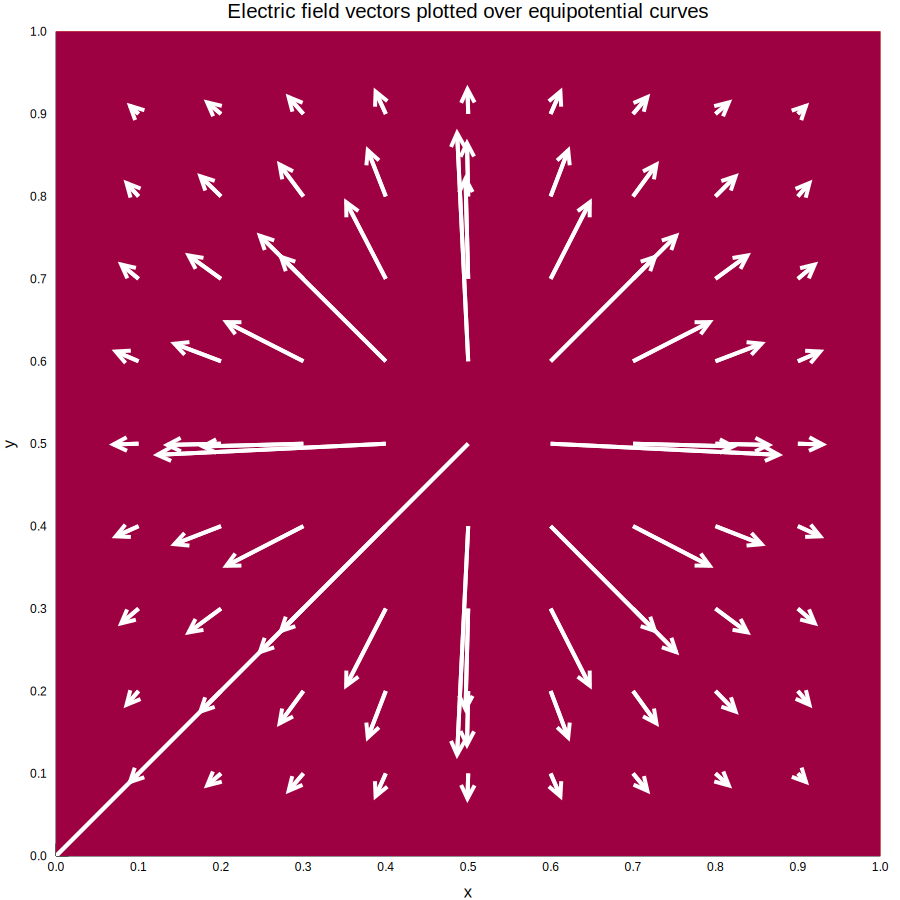

In [61]:
gradient(dim=poisson_per, scale=0.05)

In [60]:
using Plots
using CurveFit
import GR
gr()

#——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————#
# Main programs

function analytic2d(n; gp=50, V=1., L=1.)
    h = L/(gp-1)
    
    srf = zeros(gp, gp)
    
    for i in 1:gp
        srf[i,:] = [(V*4/pi)*sum((sin(k*pi*(j-1)*h/L)*sinh(k*pi*(i-1)*h/L))/(k*sinh(k*pi))
                        for k in 1:2:n) for j in 1:gp]
    end
    
    return (srf, [x for x in 0:h:L], [y for y in 0:h:L])
end

function analytic3d(; n, z, gp=50, V=1., L=1.)
    h = L/(gp-1)    
    vol = zeros(gp,gp)
    
    # Fourier double sum
    for p in 1:2:n
        for q in 1:2:n
            for i in 1:gp
                for j in 1:gp
                    cnm = 16*V*sech(pi*sqrt(p^2 + q^2)/2)/(p*q*pi^2)
                    xx = sin(p*pi*(i-1)*h/L)
                    yy = sin(q*pi*(j-1)*h/L)
                    zz = cosh(pi*sqrt(p^2 + q^2)*(z - L/2)/L)
                    vol[i,j] += cnm*xx*yy*zz
                end
            end
        end
    end
    
    return (vol, [x for x in 0:h:L], [y for y in 0:h:L])
end
    
# Calculate potential in a cube.
# mthd = integrator, gp = # of grid points, int = interior values function.
function laplace(; mthd, gp=50, V=1., L=1., intr=zeroint)
    h = L/(gp-1)
    
    # Initialize our cube with points defined by an intr function. Defaults to all zeros.
    vol = intr(gp)
    
    # Boundary conditions (the other boundary conditions are satisfied by intr).
    vol[:, :, 1] .= V
    vol[:, :, end] .= V
    
    # For plotting.
    xx = [x for x in 0:h:L]
    yy = [y for y in 0:h:L]
    zz = [z for z in 0:h:L]
    
    # Calculate the potential using given mthd.
    v, imax = mthd(vol)
    return (v, xx, yy, zz, uppercase(string(mthd)), imax)
end

#——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————#
# Helper functions

# Zeros on the interior points.
zeroint(gp) = zeros(gp,gp,gp)

# Interior points randomized.
function randint(gp)
    vol = rand(gp,gp,gp)
    for z in 2:(gp-1)
        vol[1,:,z] .= 0.
        vol[:,1,z] .= 0.
        vol[end,:,z] .= 0.
        vol[:,end,z] .= 0.
    end
    return vol
end

# Interior points given by first 5 terms of analytic soln.
function analyticint(gp)
    vol = zeros(gp,gp,gp)
    for i in 2:(gp-1)
        zz, xx, yy = analytic3d(n=5, z=(i/gp), gp=gp)
        vol[:,:,i] = zz
        vol[1,:,i] .= 0.
        vol[:,1,i] .= 0.
        vol[end,:,i] .= 0.
        vol[:,end,i] .= 0.
    end
    return vol
end

# Volume in potential cube at z=lvl. Helper function for gradient.
function dim3(args...)
    gp, V, h, lvl = args
    
    # Initialize our cube with points defined by an intr function.
    vol = analyticint(gp)
    
    # Boundary conditions.
    vol[:, :, 1] .= V
    vol[:, :, end] .= V
    
    # z-slice of volume.
    zlvl = Int(round(lvl/h))
    
    # Potential.
    v, = sor(vol)
    
    return v[:,:,zlvl]
end

# Volume on square surface. Helper function for gradient. Constant potential along edge.
function dim2(args...)
    gp, V, = args
    s = zeros(gp,gp)
    s[2:(end-1), end] .= V
    
    return sor_srf(s)
end

# Volume on square surface. Helper function for gradient. Single charge on edge.
function poisson_dir(args...)
    gp, V, h, = args
    e0 = 8.8452e-12
    s = zeros(gp,gp)
    p = zeros(gp,gp)
    p[Int(round(gp/2)), Int(round(gp/2))] = 3e-7
    
    w = 2/(1+sin(pi/gp))
    div = (gp-2)^2
    
    for _ in 1:gp^2
        c_sum = 0
        
        for i in 2:(gp-1)
            for j in 2:(gp-1)
                temp = w/4*(s[i+1,j] + s[i-1,j] + s[i,j+1] + s[i,j-1] + (h^2/e0)*p[i,j]) + (1-w)*s[i,j]
                c_sum += abs(1-s[i,j]/temp)
                s[i,j] = temp
            end
        end

        if c_sum/div < 1e-4
            break
        end
    end
    
    return s
end

function poisson_per(args...)
    gp, V, h, = args
    e0 = 8.8452e-12
    s = zeros(gp,gp)
    p = zeros(gp,gp)
    p[Int(round(gp/2)), Int(round(gp/2))] = 3e-7
    
    w = 2/(1+sin(pi/gp))
    div = (gp-2)^2
    
    for _ in 1:gp^2
        c_sum = 0
        
        for i in 1:gp
            for j in 1:gp
                lft, rt = mod(j-2,gp)+1, mod(j,gp)+1
                up, dwn = mod(i,gp)+1, mod(i-2,gp)+1
                temp = w/4*(s[up,j] + s[dwn,j] + s[i,rt] + s[i,lft] + (h^2/e0)*p[i,j]) + (1-w)*s[i,j]
                c_sum += abs(1-s[i,j]/temp)
                s[i,j] = temp
            end
        end

        if c_sum/div < 1e-5
            break
        end
    end
    
    return s
end
    
# lvl = z height of desired vector field.
function gradient(; dim, lvl=0, scale=0.1)
    # Grid spacing.
    gp = 101
    V = 1.
    L = 1.
    h = L/(gp-1)
    
    v = dim(gp, V, h, lvl)
    
    # x- and y-coordinates of every gridpoint.
    stp = 10h:10h:(L-h)
    xy = [(x,y) for x in stp for y in stp]
    
    # Initialize arrays for x and y steepest descents (size is gp-2 because we iterate only over interior points)
    grad = []
  
    # Do every other grid point to cut down on redundant calcs.
    for i in 10:10:(gp-10)
        for j in 10:10:(gp-10)
            vij = v[i, j]   # V(i,j)
            
            vpi = v[i+1, j] # V(i+1, j)
            vmi = v[i-1, j] # V(i-1, j)
            
            vpj = v[i, j+1] # V(i, j+1)
            vmj = v[i, j-1] # V(i, j-1)
                        
            dxs = [(vpi - vij)/h, -(vmi - vij)/h]
            dys = [(vpj - vij)/h, -(vmj - vij)/h]
                        
            # Take the largest change in potential along x- and y-directions.
            dx = -scale*dxs[argmax(abs.(dxs))]
            dy = -scale*dys[argmax(abs.(dys))]

            push!(grad, (dx, dy))
        end
    end
    
    p = plot(size=(900,900), title="", label="",
                xlabel="x", ylabel="y", xlims=(0.,1.), ylims=(0.,1.),
                xticks=[i for i in 0.0:0.1:1.0], yticks=[i for i in 0.0:0.1:1.0])
                
    contour!(p, [x for x in 0:h:L], [y for y in 0:h:L], v', 
                title="Electric field vectors plotted over equipotential curves", 
                levels=[i for i in 0.:0.1:1.], st=:contourf,
                color=:Spectral_r, colorbar=false, contour_labels=true)
    
    quiver!(p, xy, quiver=(grad), lw=4, seriescolor=:white)
    p
end


#——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————#
# Integrators

function jacobi(v)
    gp = size(v,1)
    div = (gp-2)^2
    imax = 0
    c = copy(v)
    
    for iter in 1:gp^2
        c_sum = 0
            
        for k in 2:(gp-1)
            for i in 2:(gp-1)
                for j in 2:(gp-1)
                    c[i,j,k] = 1/6*(v[i+1,j,k] + v[i-1,j,k] + 
                                    v[i,j+1,k] + v[i,j-1,k] + 
                                    v[i,j,k+1] + v[i,j,k-1])
                    
                    c_sum += abs(1-v[i,j,k]/c[i,j,k])
                end
            end
        end
        
        v = copy(c)
        imax = iter
       
        if c_sum/div < 1e-4
            break
        end
    end
    return (v,imax)
end

function gauss(v)
    gp = size(v,1)
    div = (gp-2)^2
    imax = 0
    
    for iter in 1:gp^2
        c_sum = 0
    
        for k in 2:(gp-1)
            for i in 2:(gp-1)
                for j in 2:(gp-1)
                    temp = 1/6*(v[i+1,j,k] + v[i-1,j,k] + 
                                v[i,j+1,k] + v[i,j-1,k] + 
                                v[i,j,k+1] + v[i,j,k-1])
                    
                    c_sum += abs(1-v[i,j,k]/temp)
                    v[i,j,k] = temp
                end
            end
        end
        
        imax = iter
        if c_sum/div < 1e-4
            break
        end
    end
    
    return (v,imax)
end

function sor(v)
    gp = size(v,1)
    w = 2/(1+sin(pi/gp))
    div = (gp-2)^2
    imax = 0
    
    for iter in 1:gp^2
        c_sum = 0
        
        for k in 2:(gp-1)
            for i in 2:(gp-1)
                for j in 2:(gp-1)
                    temp = w/6*(v[i+1,j,k] + v[i-1,j,k] + 
                                v[i,j+1,k] + v[i,j-1,k] + 
                                v[i,j,k+1] + v[i,j,k-1]) + (1-w)*v[i,j,k]
                    
                    c_sum += abs(1-v[i,j,k]/temp)
                    v[i,j,k] = temp
                end
            end
        end
        
        imax = iter
        if c_sum/div < 1e-4
            break
        end
    end
    
    return (v,imax)
end
                
function sor_srf(s)
    gp = size(s,1)
    w = 2/(1+sin(pi/gp))
    div = (gp-2)^2
    
    for _ in 1:gp^2
        c_sum = 0
        
        for i in 2:(gp-1)
            for j in 2:(gp-1)
                temp = w/4*(s[i+1,j] + s[i-1,j] + s[i,j+1] + s[i,j-1]) + (1-w)*s[i,j]
                c_sum += abs(1-s[i,j]/temp)
                s[i,j] = temp
            end
        end

        if c_sum/div < 1e-4
            break
        end
    end
    
    return s
end

#——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————#
# Plotting

function srf_plot(dat; ttl="", zslc="", zlm=(0.,1.))
    zz, xx, yy = dat
    l = @layout [a{0.1h} ; b{0.5w} c{0.5w}]
    st = string("V(x, y", zslc, ")")
        
    srf=surface(xx, yy, zz, title=st,
                xlabel="x", ylabel="y", zlabel="",
                xticks=0:0.5:1., yticks=0:0.5:1.,
                zlims=zlm,
                color=:Spectral_r, colorbar=false,
                st=:surface, camera=(45,45))

    con=contour(xx, yy, zz, title=string("Equipotential level curves"),
                xlabel="x", ylabel="y", 
                xticks=0:0.5:1., yticks=0:0.5:1.,
                levels=[i for i in 0.:0.1:1.],
                color=:Spectral_r, colorbar=false,
                st=:contourf, contour_labels=true)
    
    pt=plot(annotation = (0, 0, text(string(ttl,"\n"), 20, :left)), showaxis=:false, grid=:false)

    plot(pt, srf, con, layout=l, size=(950,550))
end

function vol_plot(dat; lvl)
    vol, xx, yy, zslices, mthd, imax = dat
    gp = size(vol,3)
    zz = vol[:,:,Int(round(gp*lvl)+1)]
    ttl = "Potential in a cube at z = $(lvl) using $(mthd), N = $(imax+1) iterations"
    srf_plot((zz,xx,yy), ttl=ttl, zslc=", z = $(lvl)")
end

function vol_gif(dat)
    vol, xx, yy, zslices, mthd, imax = dat
    gp = size(vol,3)

    anim = @animate for i in 2:(size(vol,1)-1)
        zz = vol[:,:,i]
        zi = "$(round(zslices[i], digits=2))"
        if length(zi) < 4
            zi = rpad(zi, 4, "0")
        end
        
        ttl = "Potential in a cube at z = $(zi); $(mthd) method, $(imax+1) iterations"
        srf_plot((zz,xx,yy), ttl=ttl, zslc=", z = $zi")
    end every 1
    
    gif(anim, string("laplace_", mthd, ".gif"))
end

# vol_gif(laplace(mthd=jacobi, gp=100))
# vol_gif(laplace(mthd=gauss, gp=100))
# vol_gif(laplace(mthd=sor, gp=100))

# Maximum emission projection suggested by Anshul Singhvi on Julia's Slack server.
function mep(; mthd, gp=50)
    v = zeros(gp, gp, gp)
    v[:,:,1] .= 1.
    v[:,:,end] .= 1.

    pv, numiter = mthd(v) # plot volume

    GR.title("Potential in a cube using $(uppercase(string(mthd))), with n=$(numiter+1)")
    GR.volume(pv, algorithm = 0, colormap = 47, size=(900,900))
end

#——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————#
# Exercise-specific methods

# 8.1
# TODO: calculate Fourier series only once;
# Pull relevant data at n=11, n=21, n=51, n=151 instead of running each of those sums individually.
function one_percent()
    nums=[11, 21, 51, 151]
    gp = 1000
    lft = Int(round(gp*0.4))
    rt = gp-lft+1
    
    hz = [i/gp for i in (lft-1):rt]
    v0 = [1. for i in (lft-1):rt]
    vp = [1.005 for i in (lft-1):rt]
    vm = [0.995 for i in (lft-1):rt]

    p = plot(title="Partial sum to n terms on $gp grid points",
             size=(900,900), yticks=0.9:0.01:1.1, legend=:bottomright)
    
    plot!(hz, v0, l=(3,:dash,:green), alpha=0.35, label="V_0")
    plot!(hz, vp, l=(3,:dash,:red), alpha=0.35, label="+0.5%")
    plot!(hz, vm, l=(3,:dash,:blue), alpha=0.35, label="-0.5%")

    for n in nums
        dat = analytic2d(n, gp=gp)
        srf, xx, yy = dat
        plot!(p, xx[lft:rt], srf[end, lft:rt], lw=3, label="n=$n")
    end

    p
end

# 8.3
function system_size(; mthd, V=1., L=1., intr)
    grid_sizes = [i for i in 10:5:50]
    num_iters = []
    for gp in grid_sizes
        vol = intr(gp)
        vol[:, :, 1] .= V
        vol[:, :, end] .= V
        v, imax = mthd(vol)
        push!(num_iters, imax)
    end
    
    return (grid_sizes, num_iters)
end

# 8.3
function sys_plot(; ttl, interior=zeroint)
    x1, y1 = system_size(mthd=jacobi, intr=interior)
    x2, y2 = system_size(mthd=gauss, intr=interior)
    x3, y3 = system_size(mthd=sor, intr=interior)
    
    a1, b1 = power_fit(x1, y1)
    a2, b2 = power_fit(x2, y2)
    a3, b3 = power_fit(x3, y3)
    
    xx = [x for x in 10.:0.1:50.]    
    p = plot(title=ttl, xlabel="Grid Size", ylabel="Iterations",
             xticks=[x for x in 10:5:50], yticks=[y for y in 100:200:2500], legend=:topleft, size=(900,900))
    
    plot!(p, xx, [a1*x^b1 for x in xx], lw=3, label="y = $(round(a1,digits=4)) * x^($(round(b1,digits=4)))")
    plot!(p, xx, [a2*x^b2 for x in xx], lw=3, label="y = $(round(a2,digits=4)) * x^($(round(b2,digits=4)))")
    plot!(p, xx, [a3*x^b3 for x in xx], lw=3, label="y = $(round(a3,digits=4)) * x^($(round(b3,digits=4)))")
    
    scatter!(p, x1, y1, markersize=6, label="Jacobi")
    scatter!(p, x2, y2, markersize=6, label="Gauss-Seidel")
    scatter!(p, x3, y3, markersize=6, label="SOR")
    
    p
end

# 8.3 SOR method only
function sor_plot(; ttl)
    x1, y1 = system_size(mthd=sor, intr=zeroint)
    x2, y2 = system_size(mthd=sor, intr=randint)
    x3, y3 = system_size(mthd=sor, intr=analyticint)
    
    a1, b1 = power_fit(x1, y1)
    a2, b2 = power_fit(x2, y2)
    a3, b3 = power_fit(x3, y3)
    
    xx = [x for x in 10.:0.1:50.]    
    p = plot(title=ttl, xlabel="Grid Size", ylabel="Iterations",
             xticks=[x for x in 10:5:50], yticks=[y for y in 0:10:300], legend=:topleft, size=(900,900))
    
    plot!(p, xx, [a1*x^b1 for x in xx], lw=3, label="y = $(round(a1,digits=4)) * x^($(round(b1,digits=4)))")
    plot!(p, xx, [a2*x^b2 for x in xx], lw=3, label="y = $(round(a2,digits=4)) * x^($(round(b2,digits=4)))")
    plot!(p, xx, [a3*x^b3 for x in xx], lw=3, label="y = $(round(a3,digits=4)) * x^($(round(b3,digits=4)))")
    
    scatter!(p, x1, y1, markersize=6, label="zeros")
    scatter!(p, x2, y2, markersize=6, label="random")
    scatter!(p, x3, y3, markersize=6, label="Fourier")
    
    p
end;

In [1]:
using Pkg
Pkg.status()

    Status `C:\Users\Devon\.julia\environments\v1.1\Project.toml`
  [6e4b80f9] BenchmarkTools v0.4.2
  [5a033b19] CurveFit v0.3.2
  [0c46a032] DifferentialEquations v6.3.0
  [28b8d3ca] GR v0.39.1+ [`C:\Users\Devon\.julia\dev\GR`]
  [7073ff75] IJulia v1.18.1
  [e5e0dc1b] Juno v0.7.0
  [c03570c3] Memoize v0.3.0
  [47be7bcc] ORCA v0.2.1
  [3b7a836e] PGFPlots v3.0.3
  [58dd65bb] Plotly v0.2.0
  [f0f68f2c] PlotlyJS v0.12.3
  [91a5bcdd] Plots v0.24.0+ [`C:\Users\Devon\.julia\dev\Plots`]
  [d330b81b] PyPlot v2.8.1
  [e6cf234a] RandomNumbers v1.2.0
  [8bb1440f] DelimitedFiles 
  [de0858da] Printf 
